## Imputation Test

Test how a power spectrum signal changes when segments of a sine wave time series are imputed with the mean value of the series.

In turn, determine how the total variance computed from the spectrum changes as more values are imputed.

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

%matplotlib inline

### Spectrum and variance of sine wave with no missing / imputed values

Sine wave time series:

In [51]:
f = 10 # sine wave frequency, Hz
fs = 200 # sampling frequency, Hz
t = np.arange(0, 2, 1/fs) # time, seconds
sw = np.sin(2*np.pi*f*t)

Text(0, 0.5, 'signal')

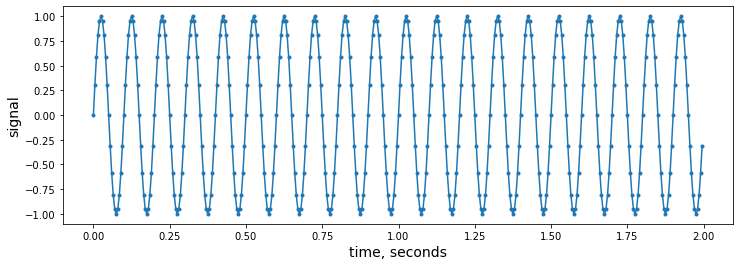

In [52]:
plt.figure(figsize=(12, 4))
plt.plot(t, sw, '.-')
plt.xlabel("time, seconds", fontsize=14)
plt.ylabel("signal", fontsize=14)

Power spectrum of full time series:

In [53]:
f, P = signal.csd(    # Cross-spectrum of sw with itself, e.g. the power spectrum.
    sw, sw, fs=fs, 
    nperseg=int(0.5*fs), # Window length expressed as numper of samples per window. 
    window='hamming', detrend='linear'
    )
P = P.real
f, P = f[1:], P[1:] # Remove 0 frequency.

Peak frequency = 10.000


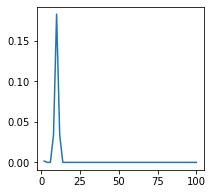

In [55]:
plt.figure(figsize=(3,3))
plt.plot(f, P)

print("Peak frequency = %0.3f" % f[np.argmax(P)])

Variance computed from PS of full time series:

In [25]:
# Inegrate area under the curve:
from scipy.integrate import trapz
trapz(P, x=f)

0.5013512597117086

In [27]:
# Double check against variance computed directly from the time series:
np.var(sw)

0.5

### Imput beginning 0.25 seconds

Impute a 0.25 s segment in the beginning of the time series with the mean value:

In [83]:
def imputedsignal_analysis(imputedsignal, fs, N_imputed):
    """
    Plot time series and power spectrum of an imputed signal. Compute variance in three ways:
        1) Directly from the time series
        2) From power spectrum of imputed signal
        3) Results of 2) with the correction factory Ntot/Ngood
        
    For spectral decomp, a 0.5 second hamming window with linear detrend is hard-coded in this fxn.
    """
    # Plot time series:
    plt.figure(figsize=(8, 3))
    plt.plot(t, imputedsignal, '.-')
    plt.xlabel("time, seconds", fontsize=14)
    plt.ylabel("signal", fontsize=14)
    
    
    # Power spectrum decomp and plot:
    f, P = signal.csd( 
        imputedsignal, imputedsignal, fs=fs, nperseg=int(0.5*fs), 
        window='hamming', detrend='linear'
        )
    P = P.real
    f, P = f[1:], P[1:]
    
    plt.figure(figsize=(3,3))
    plt.plot(f, P)

    print("Peak frequency = %0.3f" % f[np.argmax(P)])

    
    # Variance calculations:
        # Directly from time series:
    var_ts = np.var(imputedsignal)
    print("Variance from timeseries = %0.3f" % var_ts)
        # Variance from area under PS:
    var_ps = trapz(P, x=f)
    print("Variance from PS = %0.3f" % var_ps)
        # Var from time series with correction:
    Ntot = len(sw_imputed)
    Ngood = Ntot - N_imputed
    print("Corrected variance from time series = %0.3f" % (var_ts*(Ntot/Ngood)))    
        # Var from power spetrum with correction:
    print("Corrected variance from power spec = %0.3f" % (var_ps*(Ntot/Ngood)))

Peak frequency = 10.000
Variance from timeseries = 0.437
Variance from PS = 0.464
Corrected variance from time series = 0.500
Corrected variance from power spec = 0.531


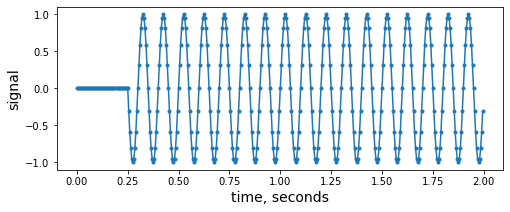

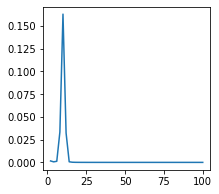

In [84]:
N_imputed = int(0.25*fs)
sw_imputed = sw.copy()
sw_imputed[0:N_imputed] = sw.mean()

imputedsignal_analysis(sw_imputed, fs, N_imputed)

### Imput beginning 0.5 seconds

Repeat previous section but for beginning 0.5 s.

Peak frequency = 10.000
Variance from timeseries = 0.375
Variance from PS = 0.393
Corrected variance from time series = 0.500
Corrected variance from power spec = 0.524


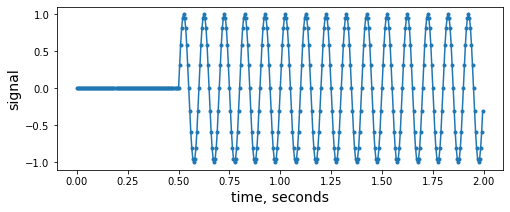

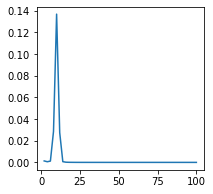

In [85]:
# Imputed sine wave:
N_imputed = int(0.5*fs)
sw_imputed = sw.copy()
sw_imputed[0:N_imputed] = sw.mean()

imputedsignal_analysis(sw_imputed, fs, N_imputed)

### Imput middle 0.5 seconds

Repeat previous section but for a 0.5 s segment towards the middle.

Peak frequency = 10.000
Variance from timeseries = 0.375
Variance from PS = 0.357
Corrected variance from time series = 0.500
Corrected variance from power spec = 0.476


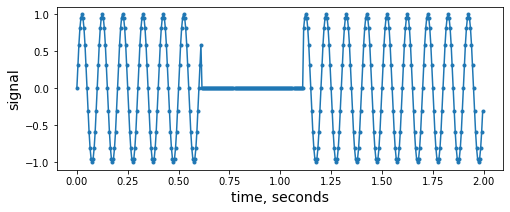

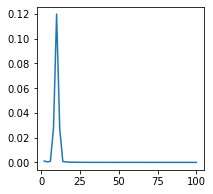

In [86]:
# Imputed sine wave:
N_imputed = int(0.5*fs)
sw_imputed = sw.copy()
sw_imputed[123:123+N_imputed] = sw.mean()

imputedsignal_analysis(sw_imputed, fs, N_imputed)

### Imput two middle segments of 0.3 seconds

Peak frequency = 10.000
Variance from timeseries = 0.350
Variance from PS = 0.325
Corrected variance from time series = 0.500
Corrected variance from power spec = 0.465


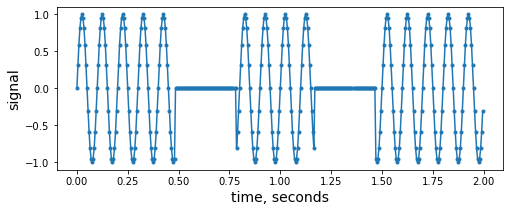

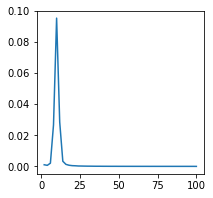

In [87]:
Nhalf_imputed = int(0.3*fs)
N_imputed = 2*Nhalf_imputed
sw_imputed = sw.copy()
sw_imputed[97:97+Nhalf_imputed] = sw.mean()
sw_imputed[234:234+Nhalf_imputed] = sw.mean()

imputedsignal_analysis(sw_imputed, fs, N_imputed)

### Assessment

With the scipy.signal.csd algorithm, spectral power is lost when the time series signal has imputed segments. Multiplying by a correction factor ```Ntot/Ngood``` recovers the signal, where ```Ntot``` is the total number of samples in the time series and ```Ngood``` removes the number of samples that have been imputed. However, there can be +/-7% error in the corrected variance.

Another key positive outcome is that the characteristics / shape of the spectrum doesn't seem to get distorted by the imputation (although more tests would verify this robustly), and the frequency of peak power remains the same 